<h1 style="text-align: center;">Learning Tikz Coordinates</h1>

# Load tikzmagic extension

In [1]:
%load_ext tikzmagic

No special TeX commands for adding a node to a picture.

# Overview

A coordinate is a position on the canvas on which your picture is drawn.

Coordinates are always put in round bracket.

The general syntax is:

```
( [<options>] <coordinate specification> )
```

# First example: line

## Specifying coordinate system explicitly

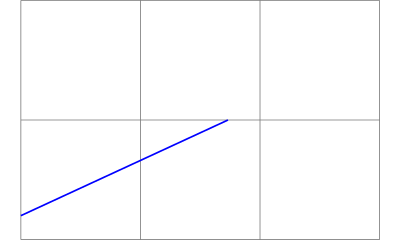

In [6]:
%%tikz -f svg
\draw[help lines] (0cm,0cm) grid (3cm,2cm);
\draw[blue] (canvas cs:x=0cm,y=2mm) -- (canvas polar cs:radius=2cm,angle=30);


## Implicit coordinate system

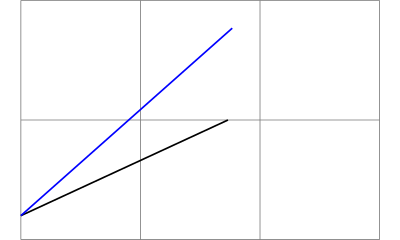

In [17]:
%%tikz -f svg

\draw[help lines] (0,0) grid (3,2);
\draw (0cm,2mm) -- (30:2cm);  % polar coord
\draw[blue] (0cm,2mm) -- (45:2.5cm);

# Transformation options

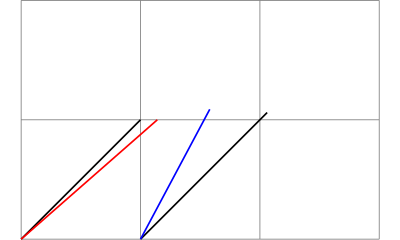

In [24]:
%%tikz -f svg
\draw[help lines] (0,0) grid (3,2);
\draw (0,0) -- (1,1);
\draw[red] (0,0) -- ([xshift=4pt] 1,1); % xshift operate on xcoord
\draw (1,0) -- +(45:1.5cm); % the origin is (1,0)
\draw[blue] (1,0) -- ([shift=(150:5pt)] 30:2cm);

# Adding coordinates

Explicitly

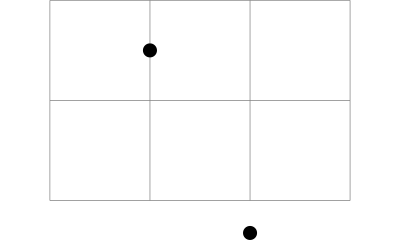

In [29]:
%%tikz -f svg
\draw[help lines] (0,0) grid (3,2);
\fill (canvas cs:x=1cm, y=1.5cm) circle (2pt);
\fill (canvas cs:x=2cm, y=-5mm+5pt) circle (2pt);

Implicitly

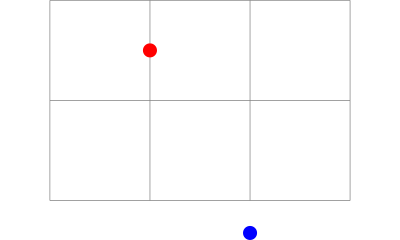

In [31]:
%%tikz -f svg
\draw[help lines] (0,0) grid (3,2);
\fill[red] (canvas cs:x=1cm, y=1.5cm) circle (2pt);
\fill[blue] (canvas cs:x=2cm, y=-5mm+5pt) circle (2pt);

# Coord xyz

The xyz coordinate system allows you to specify a point as a multiple of three vectors called the x-, y-, and z-vectors. By default, the x-vector points 1cm to the right, the y-vector points 1cm upwards, but this can be changed arbitrarily as explained in Section 25.2. The default z-vector points to -3.85mm, -3.85mm

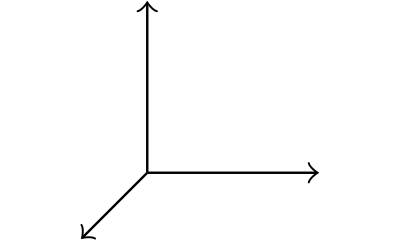

In [35]:
%%tikz -f svg
\draw[->] (0,0) -- (xyz cs:x=1);
\draw[->] (0,0) -- (xyz cs:y=1);
\draw[->] (0,0) -- (xyz cs:z=1);

This coordinate system can also be selected implicitly. To do so, you just provide two or three comma-separated factors (not dimensions).

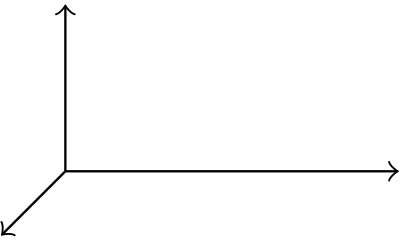

In [42]:
%%tikz -f svg
\draw[->] (0,0) -- (2,0,0);
\draw[->] (0,0) -- (0,1,0);
\draw[->] (0,0) -- (0,0,1);

# Canvas polar

The canvas polar coordinate system allows you to specify polar coordinates. You provide an angle using the angle= option and a radius using the radius= option. This yields the point on the canvas that is at the given radius distance from the origin at the given degree. An angle of zero degrees to the right, a degree of 90 upward

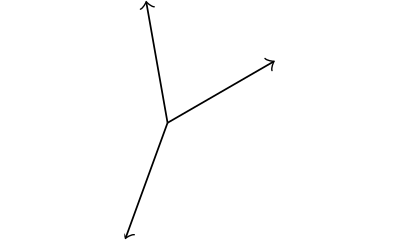

In [46]:
%%tikz -f svg
\draw[->] (0,0) -- (canvas polar cs:angle=30,radius=1cm);
\draw[->] (0,0) -- (canvas polar cs:angle=100,radius=1cm);
\draw[->] (0,0) -- (canvas polar cs:angle=250,radius=1cm);

The implicit form for canvas polar coordinates is the following: you specify the angle and the distance, separated by a colon as in (30:1cm).

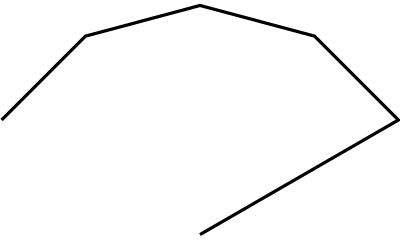

In [48]:
%%tikz -f svg
\draw (0cm,0cm) -- (30:1cm) -- (60:1cm) -- (90:1cm) -- (120:1cm) -- (150:1cm);

# xyz polar

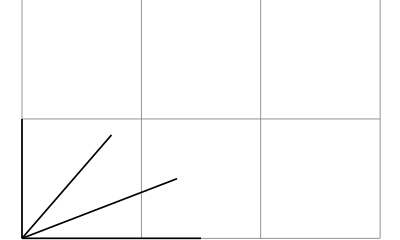

In [54]:
%%tikz -f svg
\begin{tikzpicture}[x=1.5cm,y=1cm] % scale factor
\draw[help lines] (0cm,0cm) grid (3cm,2cm);
\draw (0,0) -- (xyz polar cs:angle=0,radius=1);
\draw (0,0) -- (xyz polar cs:angle=30,radius=1);
\draw (0,0) -- (xyz polar cs:angle=60,radius=1);
\draw (0,0) -- (xyz polar cs:angle=90,radius=1);
\end{tikzpicture}

Compare with this:

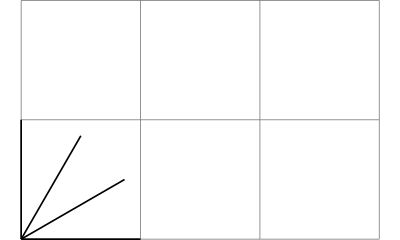

In [57]:
%%tikz -f svg
\draw[help lines] (0cm,0cm) grid (3cm,2cm);
\draw (0,0) -- (xyz polar cs:angle=0,radius=1);
\draw (0,0) -- (xyz polar cs:angle=30,radius=1);
\draw (0,0) -- (xyz polar cs:angle=60,radius=1);
\draw (0,0) -- (xyz polar cs:angle=90,radius=1);

# Barycentric (TODO)

# Node coordinate system

## Using anchor

NOTE: Arrow triangle is not yet working?

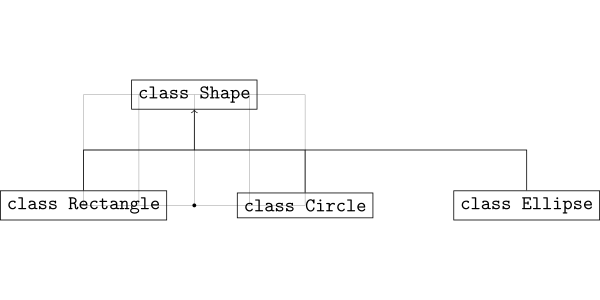

In [86]:
%%tikz -f svg --size 600,300

\draw[help lines] (-2,0) grid (2,2);

\fill (0,0) circle (1pt);

\node (shape) at (0,2) [draw] {\verb|class Shape|};
\node (rect) at (-2,0) [draw] {\verb|class Rectangle|};
\node (circle) at (2,0) [draw] {\verb|class Circle|};
\node (ellipse) at (6,0) [draw] {\verb|class Ellipse|};

\draw (node cs:name=circle,anchor=north) |- (0,1);
\draw (node cs:name=ellipse,anchor=north) |- (2,1); % avoid two lines
\draw [->]
(node cs:name=rect,anchor=north) |- (0,1) -| (node cs:name=shape,anchor=south);

## Using angle

Don't forget to load tikzlibrary

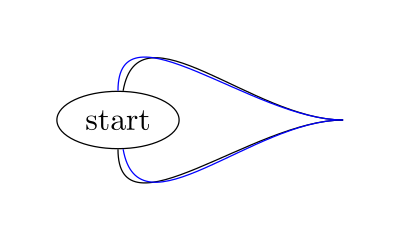

In [99]:
%%tikz -f svg -l shapes.geometric

\node (start) [draw,shape=ellipse] {start};
\draw (node cs:name=start,angle=-90) .. controls +(-90:1cm) and +(-1,0) .. (2.5,0);
\draw[blue] (node cs:name=start,angle=-80) .. controls +(-80:1cm) and +(-1,0) .. (2.5,0);

\draw (node cs:name=start,angle=80) .. controls +(80:1cm) and +(-1,0) .. (2.5,0);
\draw[blue] (node cs:name=start,angle=90) .. controls +(90:1cm) and +(-1,0) .. (2.5,0);

It is possible to provide neither the `anchor=` option nor the `angle=` option. In this case, TikZ will calculate an appropriate border position for you. Here is an example:

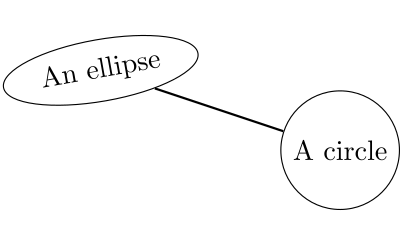

In [103]:
%%tikz -f svg -l shapes.geometric

\path (0,0) node (a) [ellipse,rotate=10,draw] {An ellipse};

\path (3,-1) node (b) [circle,draw] {A circle};

\draw[thick] (node cs:name=a) -- (node cs:name=b);

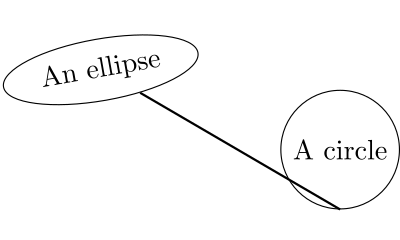

In [105]:
%%tikz -f svg -l shapes.geometric

\path (0,0) node (a) [ellipse,rotate=10,draw] {An ellipse};

\path (3,-1) node (b) [circle,draw] {A circle};

\draw[thick] (node cs:name=a) -- (node cs:name=b,anchor=south);

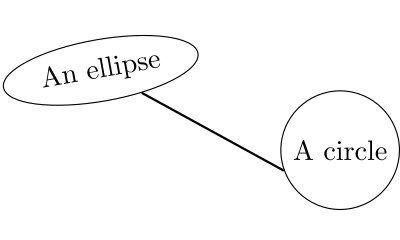

In [106]:
%%tikz -f svg -l shapes.geometric

\path (0,0) node (a) [ellipse,rotate=10,draw] {An ellipse};

\path (3,-1) node (b) [circle,draw] {A circle};

\draw[thick] (node cs:name=a) -- (node cs:name=b,angle=200);

# Others